In [12]:
import numpy as np # algebra linear e operação matricial
import pandas as pd # processamento de dados
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

In [13]:
df = pd.read_csv(r"C:\Users\002763\Downloads\Bases de Dados\bases_kaggle\space_missions\Space_Corrected.csv")

df.head()

,Unnamed: 0.1,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Company Name    4324 non-null   object
 3   Location        4324 non-null   object
 4   Datum           4324 non-null   object
 5   Detail          4324 non-null   object
 6   Status Rocket   4324 non-null   object
 7    Rocket         964 non-null    object
 8   Status Mission  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [15]:
df.shape

(4324, 9)

In [16]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Company Name', 'Location', 'Datum',
       'Detail', 'Status Rocket', ' Rocket', 'Status Mission'],
      dtype='object')

In [17]:
# dividindo a coluna de data para colher informações de Mês e Ano
df['Month'] = df['Datum'].str.split(' ',expand = True)[1]
df['Year'] = df['Datum'].str.split(' ', expand = True)[3]

# dividindo a coluna de local para extrair apenas o nome do País
df['Country'] = df['Location'].str.split(', ').str[-1]

df.head(10)

,Unnamed: 0.1,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Month,Year,Country
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,Aug,2020,USA
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,Aug,2020,China
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,Aug,2020,USA
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Jul,2020,Kazakhstan
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,Jul,2020,USA
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,Jul,2020,China
6,6,6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Thu Jul 23, 2020 14:26 UTC",Soyuz 2.1a | Progress MS-15,StatusActive,48.5,Success,Jul,2020,Kazakhstan
7,7,7,CASC,"LC-101, Wenchang Satellite Launch Center, China","Thu Jul 23, 2020 04:41 UTC",Long March 5 | Tianwen-1,StatusActive,NaN,Success,Jul,2020,China
8,8,8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Mon Jul 20, 2020 21:30 UTC",Falcon 9 Block 5 | ANASIS-II,StatusActive,50.0,Success,Jul,2020,USA
9,9,9,JAXA,"LA-Y1, Tanegashima Space Center, Japan","Sun Jul 19, 2020 21:58 UTC",H-IIA 202 | Hope Mars Mission,StatusActive,90.0,Success,Jul,2020,Japan


In [18]:
# removendo colunas irrelevantes

df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Datum', 'Location'], axis=1, inplace = True)
df.head(2)

,Company Name,Detail,Status Rocket,Rocket,Status Mission,Month,Year,Country
0,SpaceX,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,Aug,2020,USA
1,CASC,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,Aug,2020,China


In [19]:
# renomeando e reorganizando as colunas para melhor entendimento

new_columns_dict ={'Company Name': 'Empresa', 'Detail': 'Detalhes_Foguete', 'Status Rocket': 'Status_Foguete', ' Rocket': 'Custo_Missao', 'Status Mission': 'Status_Missao', 'Month': 'Mês', 'Year': 'Ano', 'Country': 'País'}

df = df.rename(columns = new_columns_dict)

df = df[['País', 'Empresa', 'Ano', 'Mês', 'Detalhes_Foguete', 'Status_Foguete', 'Status_Missao', 'Custo_Missao']]

df.head(3)

,País,Empresa,Ano,Mês,Detalhes_Foguete,Status_Foguete,Status_Missao,Custo_Missao
0,USA,SpaceX,2020,Aug,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,Success,50.0
1,China,CASC,2020,Aug,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,Success,29.75
2,USA,SpaceX,2020,Aug,Starship Prototype | 150 Meter Hop,StatusActive,Success,NaN


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   País              4324 non-null   object
 1   Empresa           4324 non-null   object
 2   Ano               4324 non-null   object
 3   Mês               4324 non-null   object
 4   Detalhes_Foguete  4324 non-null   object
 5   Status_Foguete    4324 non-null   object
 6   Status_Missao     4324 non-null   object
 7   Custo_Missao      964 non-null    object
dtypes: object(8)
memory usage: 270.4+ KB


In [20]:
#convertendo Custo_Missao para númerico (irá falhar por um erro de conversão de string)

df['Custo_Missao'] = pd.to_numeric(df['Custo_Missao'])

ValueError: Unable to parse string "5,000.0 " at position 1916

In [22]:
#localizando a célula apresentando problema de conversão

df['Custo_Missao'].iloc[1916]

'5,000.0 '

In [23]:
#convertendo essa string para numérico

df.at[1916,'Custo_Missao'] = 50000

In [24]:
# tentando converter novamente para número o Custo_Missao (irá falhar novamente porque existem muitas linhas com o mesmo problema de conversão)

df['Custo_Missao'] = pd.to_numeric(df['Custo_Missao'])

ValueError: Unable to parse string "5,000.0 " at position 2000

In [25]:
# removendo caracteres especiais

df['Custo_Missao'] = df['Custo_Missao'].str.replace("'","").str.replace(',','')

In [26]:
# tentando converter Custo_Missao para numérico novamente

df['Custo_Missao'] = pd.to_numeric(df['Custo_Missao'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   País              4324 non-null   object 
 1   Empresa           4324 non-null   object 
 2   Ano               4324 non-null   object 
 3   Mês               4324 non-null   object 
 4   Detalhes_Foguete  4324 non-null   object 
 5   Status_Foguete    4324 non-null   object 
 6   Status_Missao     4324 non-null   object 
 7   Custo_Missao      963 non-null    float64
dtypes: float64(1), object(7)
memory usage: 270.4+ KB


In [27]:
# tentando converter ano para numérico

df['Ano'] = pd.to_numeric(df['Ano'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   País              4324 non-null   object 
 1   Empresa           4324 non-null   object 
 2   Ano               4324 non-null   int64  
 3   Mês               4324 non-null   object 
 4   Detalhes_Foguete  4324 non-null   object 
 5   Status_Foguete    4324 non-null   object 
 6   Status_Missao     4324 non-null   object 
 7   Custo_Missao      963 non-null    float64
dtypes: float64(1), int64(1), object(6)
memory usage: 270.4+ KB


In [28]:
# identificando números faltantes

missing = pd.concat([pd.isnull(df).sum(), 100*pd.isnull(df).mean()], axis = 1)

missing.columns = ['count', '%']

missing.sort_values(by = ['count'])

,count,%
País,0,0.000000
Empresa,0,0.000000
Ano,0,0.000000
Mês,0,0.000000
Detalhes_Foguete,0,0.000000
Status_Foguete,0,0.000000
Status_Missao,0,0.000000
Custo_Missao,3361,77.728955


In [29]:
# preencher colunas em branco do Custo_Missao com a média

df['Custo_Missao']=df['Custo_Missao'].fillna(df['Custo_Missao'].mean())


df.head(50)

,País,Empresa,Ano,Mês,Detalhes_Foguete,Status_Foguete,Status_Missao,Custo_Missao
0,USA,SpaceX,2020,Aug,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,Success,50.000000
1,China,CASC,2020,Aug,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,Success,29.750000
2,USA,SpaceX,2020,Aug,Starship Prototype | 150 Meter Hop,StatusActive,Success,148.759792
3,Kazakhstan,Roscosmos,2020,Jul,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,Success,65.000000
4,USA,ULA,2020,Jul,Atlas V 541 | Perseverance,StatusActive,Success,145.000000
5,China,CASC,2020,Jul,"Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,Success,64.680000
6,Kazakhstan,Roscosmos,2020,Jul,Soyuz 2.1a | Progress MS-15,StatusActive,Success,48.500000
7,China,CASC,2020,Jul,Long March 5 | Tianwen-1,StatusActive,Success,148.759792
8,USA,SpaceX,2020,Jul,Falcon 9 Block 5 | ANASIS-II,StatusActive,Success,50.000000
9,Japan,JAXA,2020,Jul,H-IIA 202 | Hope Mars Mission,StatusActive,Success,90.000000


In [30]:
missing = pd.concat([pd.isnull(df).sum(),100*pd.isnull(df).mean()], axis =1)

missing.columns = ['count', '%']

missing.sort_values(by = ['count'])

,count,%
País,0,0.0
Empresa,0,0.0
Ano,0,0.0
Mês,0,0.0
Detalhes_Foguete,0,0.0
Status_Foguete,0,0.0
Status_Missao,0,0.0
Custo_Missao,0,0.0


In [31]:
# identificando valores únicos

df.columns

Index(['País', 'Empresa', 'Ano', 'Mês', 'Detalhes_Foguete', 'Status_Foguete',
       'Status_Missao', 'Custo_Missao'],
      dtype='object')

In [32]:
df['País'].unique()

array(['USA', 'China', 'Kazakhstan', 'Japan', 'Israel', 'New Zealand',
       'Russia', 'Shahrud Missile Test Site', 'France', 'Iran', 'India',
       'New Mexico', 'Yellow Sea', 'North Korea',
       'Pacific Missile Range Facility', 'Pacific Ocean', 'South Korea',
       'Barents Sea', 'Brazil', 'Gran Canaria', 'Kenya', 'Australia'],
      dtype=object)

In [33]:
# substituindo locais que não são países para seu país de origem

df.loc[df['País'].str.contains('Shahrud Missile Test Site', case = False)]

,País,Empresa,Ano,Mês,Detalhes_Foguete,Status_Foguete,Status_Missao,Custo_Missao
35,Shahrud Missile Test Site,IRGC,2020,Apr,Qased | Noor 1,StatusActive,Success,148.759792


In [34]:
countries_dict = {
    "Shahrud Missile Test Site": "Iran",
    "New Mexico": "USA",
    "Yellow Sea": "China",
    "Pacific Missile Range Facility": "USA",
    "Pacific Ocean": "Multi National",
    "Barents Sea": "Russia",
    "Gran Canaria": "USA"
}

df['País'] = df['País'].replace(countries_dict)
df['País'].unique()

array(['USA', 'China', 'Kazakhstan', 'Japan', 'Israel', 'New Zealand',
       'Russia', 'Iran', 'France', 'India', 'North Korea',
       'Multi National', 'South Korea', 'Brazil', 'Kenya', 'Australia'],
      dtype=object)

In [35]:
df['Empresa'].unique()

array(['SpaceX', 'CASC', 'Roscosmos', 'ULA', 'JAXA', 'Northrop', 'ExPace',
       'IAI', 'Rocket Lab', 'Virgin Orbit', 'VKS RF', 'MHI', 'IRGC',
       'Arianespace', 'ISA', 'Blue Origin', 'ISRO', 'Exos', 'ILS',
       'i-Space', 'OneSpace', 'Landspace', 'Eurockot', 'Land Launch',
       'CASIC', 'KCST', 'Sandia', 'Kosmotras', 'Khrunichev', 'Sea Launch',
       'KARI', 'ESA', 'NASA', 'Boeing', 'ISAS', 'SRC', 'MITT', 'Lockheed',
       'AEB', 'Starsem', 'RVSN USSR', 'EER', 'General Dynamics',
       'Martin Marietta', 'Yuzhmash', 'Douglas', 'ASI', 'US Air Force',
       'CNES', 'CECLES', 'RAE', 'UT', 'OKB-586', 'AMBA',
       "Arm??e de l'Air", 'US Navy'], dtype=object)

In [36]:
company_dict = {"Arm??e de l'Air": "Arme de l'Air"}
df['Empresa'] = df['Empresa'].replace(company_dict)
df["Empresa"].unique()

array(['SpaceX', 'CASC', 'Roscosmos', 'ULA', 'JAXA', 'Northrop', 'ExPace',
       'IAI', 'Rocket Lab', 'Virgin Orbit', 'VKS RF', 'MHI', 'IRGC',
       'Arianespace', 'ISA', 'Blue Origin', 'ISRO', 'Exos', 'ILS',
       'i-Space', 'OneSpace', 'Landspace', 'Eurockot', 'Land Launch',
       'CASIC', 'KCST', 'Sandia', 'Kosmotras', 'Khrunichev', 'Sea Launch',
       'KARI', 'ESA', 'NASA', 'Boeing', 'ISAS', 'SRC', 'MITT', 'Lockheed',
       'AEB', 'Starsem', 'RVSN USSR', 'EER', 'General Dynamics',
       'Martin Marietta', 'Yuzhmash', 'Douglas', 'ASI', 'US Air Force',
       'CNES', 'CECLES', 'RAE', 'UT', 'OKB-586', 'AMBA', "Arme de l'Air",
       'US Navy'], dtype=object)

In [37]:
df['Ano'].unique()

array([2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010,
       2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999,
       1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990, 1989, 1988,
       1987, 1986, 1985, 1984, 1983, 1982, 1981, 1980, 1979, 1978, 1977,
       1976, 1975, 1974, 1973, 1972, 1971, 1970, 1969, 1968, 1967, 1966,
       1965, 1964, 1963, 1962, 1961, 1960, 1959, 1958, 1957], dtype=int64)

In [38]:
df['Mês'].unique()

array(['Aug', 'Jul', 'Jun', 'May', 'Apr', 'Mar', 'Feb', 'Jan', 'Dec',
       'Nov', 'Oct', 'Sep'], dtype=object)

In [39]:
df['Status_Foguete'].unique()

array(['StatusActive', 'StatusRetired'], dtype=object)

In [41]:
df['Status_Missao'].unique()

array(['Success', 'Failure', 'Prelaunch Failure', 'Partial Failure'],
      dtype=object)

In [42]:
df['Custo_Missao'].unique()

array([  50.        ,   29.75      ,  148.75979232,   65.        ,
        145.        ,   64.68      ,   48.5       ,   90.        ,
         46.        ,   28.3       ,   29.15      ,    7.5       ,
         30.8       ,    5.3       ,   12.        ,  112.5       ,
        120.        ,  153.        ,  200.        ,   85.        ,
        115.        ,   41.8       ,   21.        ,   31.        ,
         40.        ,  164.        ,   62.        ,   37.        ,
        350.        ,   39.        ,   47.        ,   35.        ,
         69.7       ,  109.        ,   45.        ,  123.        ,
        130.        ,   25.        ,   56.5       ,   15.        ,
         29.        ,   80.        ,  140.        ,   55.        ,
         59.5       ,  450.        ,    7.        ,   20.14      ,
        133.        ,  190.        ,  135.        ,   20.        ,
        136.6       , 5000.        , 1160.        ,   59.        ,
         63.23      ])

In [43]:
df.select_dtypes(['float64','int64'])

,Ano,Custo_Missao
0,2020,50.000000
1,2020,29.750000
2,2020,148.759792
3,2020,65.000000
4,2020,145.000000
...,...,...
4319,1958,148.759792
4320,1958,148.759792
4321,1957,148.759792
4322,1957,148.759792


In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ano,4324.0,1987.386679,18.072562,1957.0,1972.000000,1984.000000,2002.000000,2020.0
Custo_Missao,4324.0,148.759792,114.438926,5.3,148.759792,148.759792,148.759792,5000.0


### Análise Exploratória

<function matplotlib.pyplot.show(close=None, block=None)>

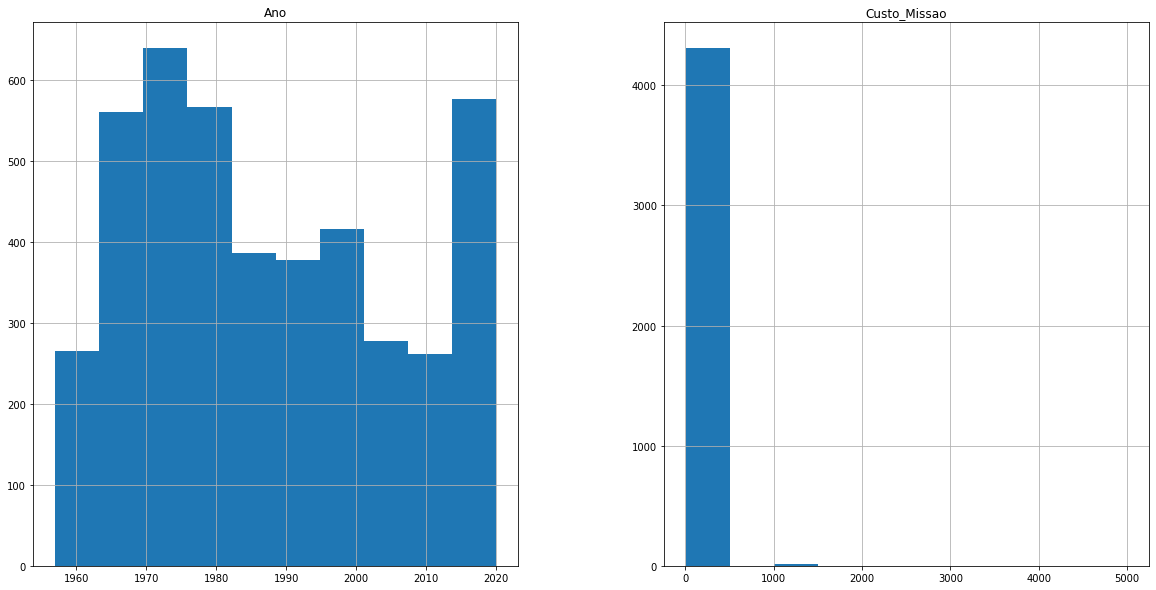

In [45]:
## Histograma

df.hist(figsize=(20,10));
plt.show

In [46]:
df_pais = df['País'].value_counts().rename_axis("país").reset_index(name = "qtd_lanc")
df_pais

,país,qtd_lanc
0,Russia,1398
1,USA,1351
2,Kazakhstan,701
3,France,303
4,China,269
5,Japan,126
6,India,76
7,Multi National,36
8,Iran,14
9,New Zealand,13


In [57]:
df_pais = df_pais[df_pais["qtd_lanc"]>30].sort_values('qtd_lanc', ascending=False)

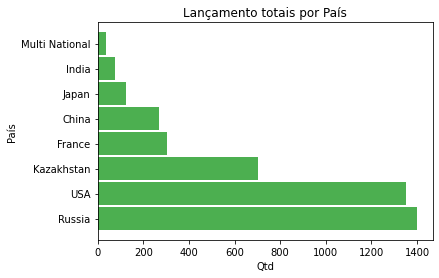

In [58]:
plt.barh(df_pais['país'], df_pais["qtd_lanc"], color = "#4CAF50", height = 0.9)
plt.xlabel('Qtd')
plt.ylabel('País')
plt.title("Lançamento totais por País")
plt.show()

In [63]:
df_pais_custo = df[['País','Custo_Missao']].groupby('País').mean().reset_index("País").sort_values('Custo_Missao', ascending= False)
df_pais_custo

,País,Custo_Missao
15,USA,172.738343
3,France,155.864808
8,Kazakhstan,149.410733
0,Australia,148.759792
1,Brazil,148.759792
5,Iran,148.759792
6,Israel,148.759792
9,Kenya,148.759792
10,Multi National,148.759792
12,North Korea,148.759792


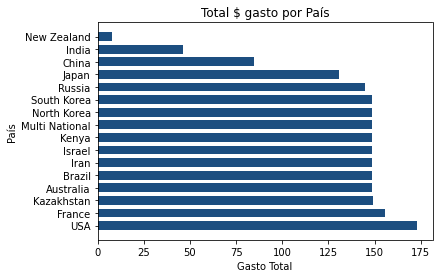

In [64]:
plt.barh(df_pais_custo["País"], df_pais_custo["Custo_Missao"], color = '#1C4E80', height = 0.7)
plt.xlabel("Gasto Total")
plt.ylabel("País")
plt.title("Total $ gasto por País")
plt.show()

In [67]:
df_empresa_custo = df[["Empresa","Custo_Missao"]].groupby("Empresa").mean().reset_index("Empresa").sort_values('Custo_Missao', ascending= False)
df_empresa_custo.head(10)

,Empresa,Custo_Missao
35,NASA,415.335117
3,Arianespace,156.157857
40,RVSN USSR,151.489809
48,ULA,150.327938
6,Boeing,150.228038
38,OneSpace,148.759792
27,Khrunichev,148.759792
1,AMBA,148.759792
29,Land Launch,148.759792
30,Landspace,148.759792


In [68]:
df_empresa_custo['Custo_Missao'] = df_empresa_custo['Custo_Missao'].astype(int)
df_empresa_custo = df_empresa_custo[df_empresa_custo['Custo_Missao'] != 148]
df_empresa_custo.head(10)

,Empresa,Custo_Missao
35,NASA,415
3,Arianespace,156
40,RVSN USSR,151
48,ULA,150
6,Boeing,150
34,Martin Marietta,143
13,ESA,140
31,Lockheed,137
15,ExPace,136
19,ILS,135


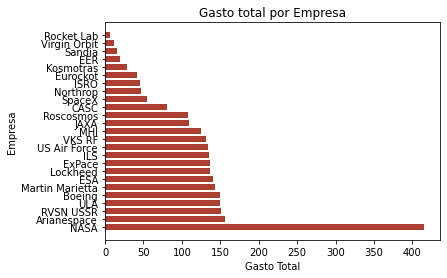

<Figure size 21600x7200 with 0 Axes>

In [70]:
plt.barh(df_empresa_custo['Empresa'], df_empresa_custo['Custo_Missao'], color = '#AC3E31', height=0.7)
plt.xlabel("Gasto Total")
plt.ylabel("Empresa")
plt.title("Gasto total por Empresa")
plt.figure(figsize=(300,100))
plt.show()

In [71]:
df_missao = df['Status_Missao'].value_counts().rename_axis('Status_Missao').reset_index(name = 'QTD')
df_missao

,Status_Missao,QTD
0,Success,3879
1,Failure,339
2,Partial Failure,102
3,Prelaunch Failure,4


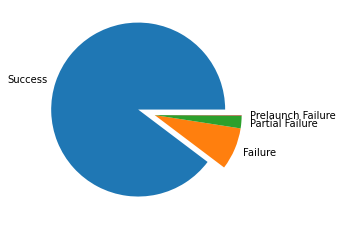

In [72]:
plt.pie(df_missao["QTD"],explode = [0.2,0,0,0], labels = df_missao["Status_Missao"])
plt.show()

In [73]:
df_ano = df['Ano'].value_counts().rename_axis('Ano').reset_index(name = "QTD")
df_ano

,Ano,QTD
0,1971,119
1,2018,117
2,1977,114
3,1975,113
4,1976,113
...,...,...
59,2010,37
60,2005,37
61,1958,28
62,1959,20


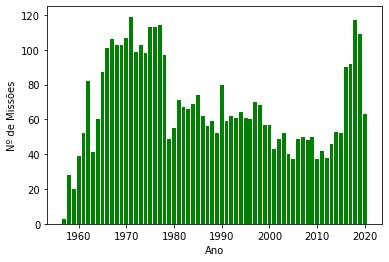

In [74]:
plt.bar(df_ano['Ano'], df_ano["QTD"], color = 'g')
plt.xlabel("Ano")
plt.ylabel("Nº de Missões")
plt.show()

In [79]:
df_pais_status = df.groupby(['País', 'Status_Missao'])['País'].count().unstack('Status_Missao').fillna(0)
df_pais_status

Status_Missao,Failure,Partial Failure,Prelaunch Failure,Success
País,,,,
Australia,3.0,0.0,0.0,3.0
Brazil,2.0,0.0,1.0,0.0
China,19.0,6.0,0.0,244.0
France,13.0,5.0,0.0,285.0
India,8.0,5.0,0.0,63.0
Iran,8.0,0.0,1.0,5.0
Israel,2.0,0.0,0.0,9.0
Japan,10.0,3.0,0.0,113.0
Kazakhstan,72.0,20.0,1.0,608.0


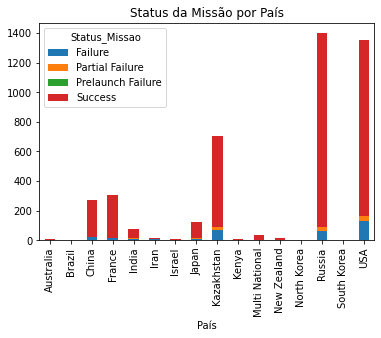

In [80]:
df_pais_status.plot(kind = 'bar', stacked = True, title = 'Status da Missão por País')
plt.show()

<AxesSubplot:title={'center':'Status de foguete por País'}, xlabel='País'>

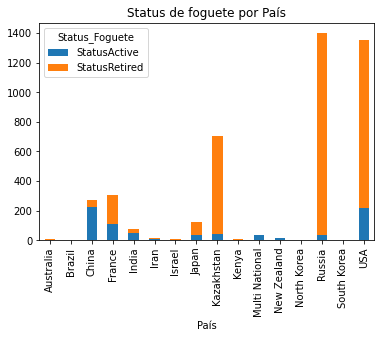

In [81]:
df_pais_foguete = df.groupby(['País', 'Status_Foguete'])['País'].count().unstack('Status_Foguete').fillna(0)
df_pais_foguete.plot(kind = 'bar', stacked = True, title = "Status de foguete por País")